# Determining Medical Costs

In [1]:
#import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [10]:
#load dataset
med_cost = pd.read_csv("C:\\Users\\ofagb\\OneDrive\\Documents\\Machine Learning\\Health Insurance Costs.csv")
med_cost #df overview (head, no of rows & columns)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [11]:
#understanding df
med_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [33]:
med_cost.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
med_cost.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [24]:
#grouping by categorical variables
med_cost.groupby(['sex', 'region'])['bmi', 'children', 'charges'].mean()

C:\Users\ofagb\AppData\Local\Temp\ipykernel_23404\1208946962.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  med_cost.groupby(['sex', 'region'])['bmi', 'children', 'charges'].mean()


bmi  children       charges
sex    region                                      
female northeast  29.324317  1.006211  12953.203151
       northwest  29.277957  1.115854  12479.870397
       southeast  32.671257  1.051429  13499.669243
       southwest  30.060494  1.123457  11274.411264
male   northeast  29.024540  1.085890  13854.005374
       northwest  29.120155  1.180124  12354.119575
       southeast  33.990000  1.047619  15879.617173
       southwest  31.129448  1.159509  13412.883576

[Text(0.5, 1.0, 'Age Distribution')]

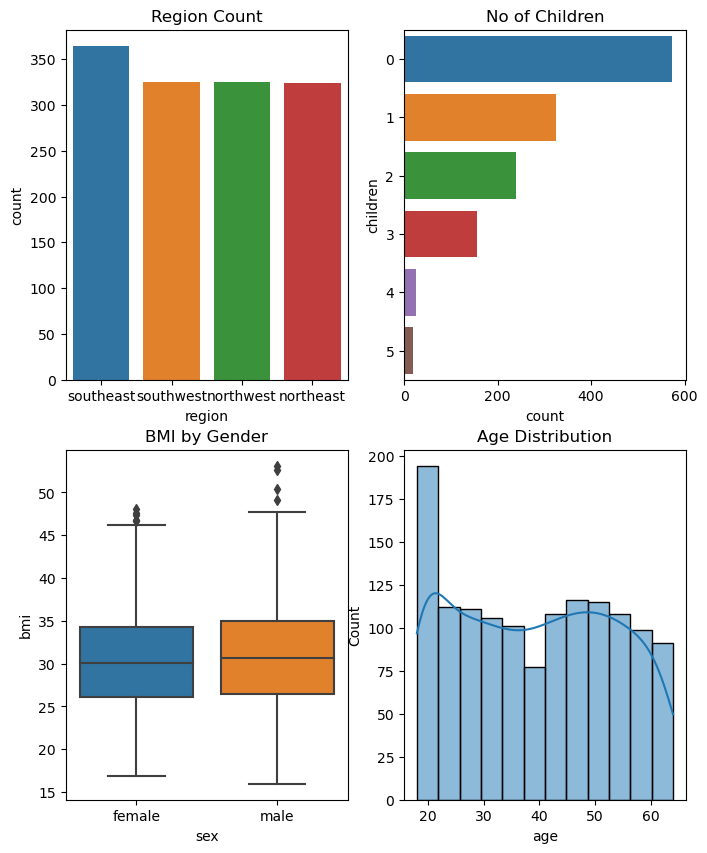

In [41]:
#visualization key distribution of key features
fig, axes = plt.subplots(2, 2, figsize = (8,10))

#different plots were combined for this visualization (count plots and subplots)
sns.countplot(x='region', data= med_cost, order= med_cost['region'].value_counts().index, ax =axes[0,0]).set(title='Region Count')
sns.countplot(y='children', data= med_cost, order= med_cost['children'].value_counts().index, ax=axes[0,1]).set(title='No of Children')
sns.boxplot (x = 'sex', y = 'bmi', data = med_cost, ax = axes[1,0]).set(title = 'BMI by Gender')
sns.histplot(x = 'age', data = med_cost, kde = True, ax = axes[1,1]).set(title = 'Age Distribution')

In [53]:
#Feature selection using correlation plot
cor = x.corr()

<AxesSubplot:>

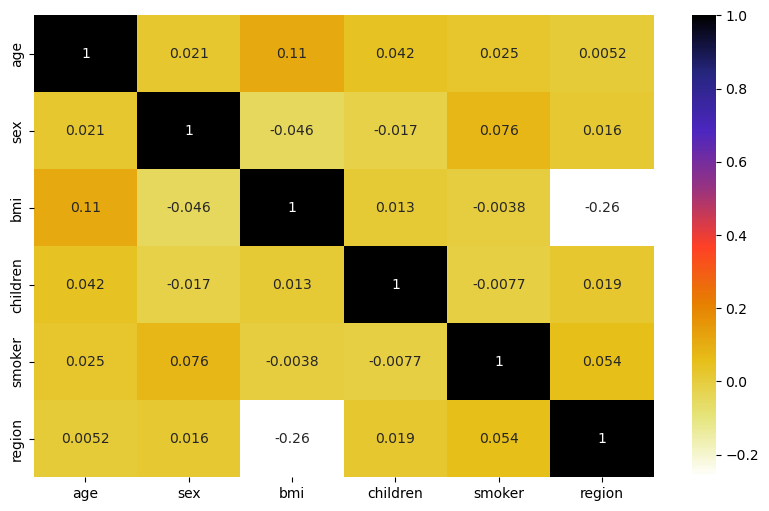

In [54]:
plt.figure(figsize=(10,6))
sns.heatmap(cor, annot = True, cmap=plt.cm.CMRmap_r)
#no multicollinearity among features as all corr < 0.7

In [42]:
#encoding categorical variables (sex, smoker, region)
# sex column
med_cost.replace({'sex':{'male':0,'female':1}}, inplace=True)

#smoker column
med_cost.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

#region column
med_cost.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [43]:
med_cost

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [47]:
#splitting the features and target 
x = med_cost.drop(columns = 'charges', axis = 1)
Y = med_cost[['charges']]

In [45]:
#features df
x.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3


In [48]:
#target df
Y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [51]:
#splitting data into train and test sets
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.2, random_state = 42)

In [52]:
#training data 80% (1070) and test data 20% (268)
print(x.shape, x_train.shape, x_test.shape) 

(1338, 6) (1070, 6) (268, 6)


## Model Training

In [55]:
# loading the Linear Regression model
regressor = LinearRegression()

In [56]:
regressor.fit(x_train, Y_train)

LinearRegression()

In [58]:
# prediction on training data
training_data_prediction =regressor.predict(x_train)

In [59]:
#Model Evaluation R squared value (training data)
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.7413131194887537


In [60]:
# prediction on test data
test_data_prediction =regressor.predict(x_test)

In [61]:
# Model Evaluation R squared value (test data)
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.783021587162344


In [65]:
#Using model for prediction
input_data = (31,0, 29,0,1,2) #37 year old man with a BMI of 29 ,no kids, smoker from the north east

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[[5423.87918981]]
The insurance cost is USD  [5423.87918981]


C:\Users\ofagb\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
